In [4]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [5]:
df = pd.read_excel("Sample - Superstore.xls")

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
furniture = df.loc[df['Category'] == 'Furniture']   ## Subsetting data

In [8]:
furniture.shape

(2121, 21)

In [ ]:
## 2121 rows and 21 columns

In [9]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [10]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [ ]:
## we ahve data from 2014 to 2017 - 4 years
# will drop unccesary columns 

In [11]:
cols = ["Row ID", "Order ID", "Ship Date", "Ship Mode", "Customer ID", "Customer Name", "Segment", "Country", 
        "City", "State", "Postal Code", "Region", "Product ID", "Category", "Sub-Category", "Product Name", 
         "Quantity", "Discount", "Profit"]

In [13]:
furniture.drop(cols, axis=1, inplace= True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
furniture.sort_values('Order Date')

,Order Date,Sales
7474,2014-01-06,2573.8200
7660,2014-01-07,76.7280
866,2014-01-10,51.9400
716,2014-01-11,9.9400
2978,2014-01-13,545.9400
4938,2014-01-13,333.9990
6474,2014-01-14,61.9600
970,2014-01-16,127.1040
5465,2014-01-19,181.4700
6327,2014-01-20,272.9400


In [17]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
## grouping data as per data, because we have different rows for same date.
#indexing is required for Time serie
# here we are making order date as a index.


In [18]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [20]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [27]:
y = furniture['Sales'].resample('MS').mean()

In [25]:
y[:2017]

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

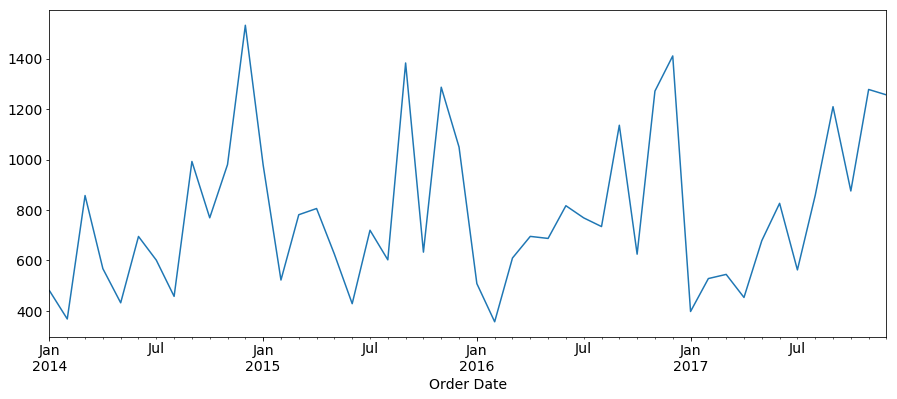

In [26]:
y.plot(figsize=(15,6))
plt.show()

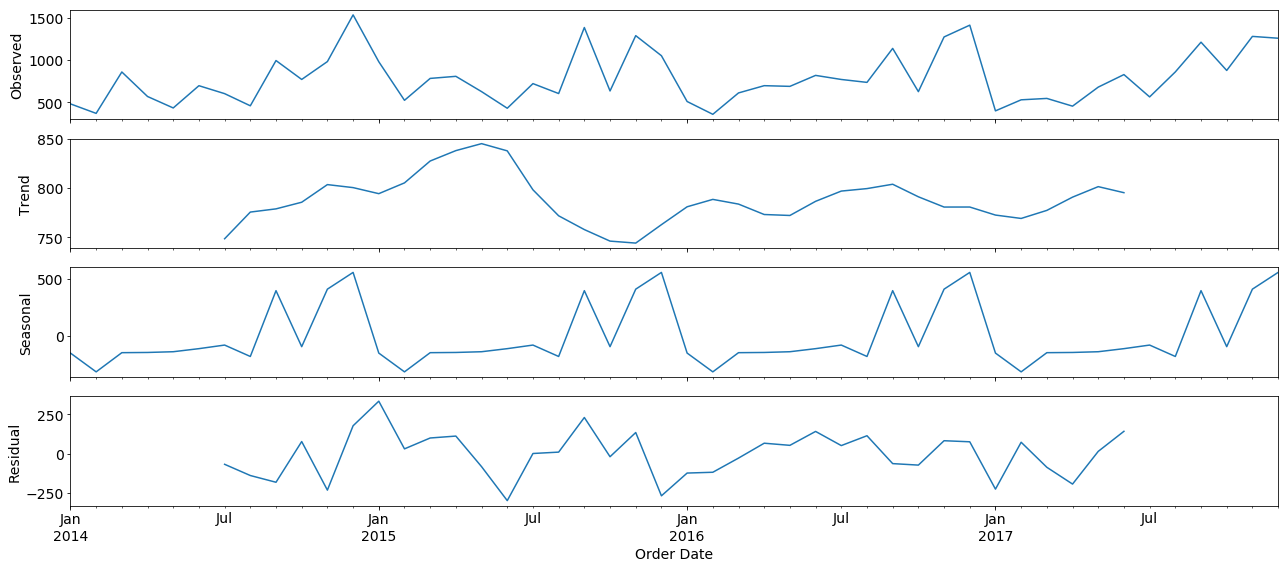

In [30]:
#in Above figure , we are not able to identify properly 
# so we are decoposing model, i.e. dividing in trend, seasonal, noise 
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig =decomposition.plot()
plt.show()

In [ ]:
##Time series Forecaring using ARIMA


In [32]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))] 

In [33]:
print("Example of parameter combinations for seasonal ARIMA...")
print("SARIMAX : {} x {}".format(pdq[1], seasonal_pdq[1]))
print("SARIMAX : {} x {}".format(pdq[1], seasonal_pdq[2]))
print("SARIMAX : {} x {}".format(pdq[2], seasonal_pdq[3]))
print("SARIMAX : {} x {}".format(pdq[2], seasonal_pdq[4]))

Example of parameter combinations for seasonal ARIMA...
SARIMAX : (0, 0, 1) x (0, 0, 1, 12)
SARIMAX : (0, 0, 1) x (0, 1, 0, 12)
SARIMAX : (0, 1, 0) x (0, 1, 1, 12)
SARIMAX : (0, 1, 0) x (1, 0, 0, 12)


In [37]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y , order= param, seasonal_order = param_seasonal, 
                                           enforce_stationarity = False , enforce_invertibility = False)
            results = mod.fit()
            print("ARIMA{} x {}12 - AIC {} ".format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0) x (0, 0, 0, 12)12 - AIC 769.0817523205916 
ARIMA(0, 0, 0) x (0, 0, 1, 12)12 - AIC 1576.73092538134 
ARIMA(0, 0, 0) x (0, 1, 0, 12)12 - AIC 477.71701309202774 
ARIMA(0, 0, 0) x (1, 0, 0, 12)12 - AIC 497.23144334183365 
ARIMA(0, 0, 0) x (1, 0, 1, 12)12 - AIC 1478.127724912537 


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) x (1, 1, 0, 12)12 - AIC 318.0047199116341 
ARIMA(0, 0, 1) x (0, 0, 0, 12)12 - AIC 720.9252270758109 
ARIMA(0, 0, 1) x (0, 0, 1, 12)12 - AIC 2786.7230874852653 
ARIMA(0, 0, 1) x (0, 1, 0, 12)12 - AIC 466.56074298091505 


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1) x (1, 0, 0, 12)12 - AIC 499.6005804848146 
ARIMA(0, 0, 1) x (1, 0, 1, 12)12 - AIC 2768.427220528199 
ARIMA(0, 0, 1) x (1, 1, 0, 12)12 - AIC 319.9884876946866 
ARIMA(0, 1, 0) x (0, 0, 0, 12)12 - AIC 677.894766843944 
ARIMA(0, 1, 0) x (0, 0, 1, 12)12 - AIC 1378.5486307085782 
ARIMA(0, 1, 0) x (0, 1, 0, 12)12 - AIC 486.63785671879367 
ARIMA(0, 1, 0) x (1, 0, 0, 12)12 - AIC 497.78896630044073 


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) x (1, 0, 1, 12)12 - AIC 1023.1791464719739 
ARIMA(0, 1, 0) x (1, 1, 0, 12)12 - AIC 319.7714068109211 
ARIMA(0, 1, 1) x (0, 0, 0, 12)12 - AIC 649.905617681726 
ARIMA(0, 1, 1) x (0, 0, 1, 12)12 - AIC 3216.0197782079413 
ARIMA(0, 1, 1) x (0, 1, 0, 12)12 - AIC 458.8705548483124 
ARIMA(0, 1, 1) x (1, 0, 0, 12)12 - AIC 486.1832977442631 


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1) x (1, 0, 1, 12)12 - AIC 2589.717123007444 
ARIMA(0, 1, 1) x (1, 1, 0, 12)12 - AIC 310.75743684174114 
ARIMA(1, 0, 0) x (0, 0, 0, 12)12 - AIC 692.1645522067713 


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x (0, 0, 1, 12)12 - AIC 1449.9825510597434 
ARIMA(1, 0, 0) x (0, 1, 0, 12)12 - AIC 479.46321478521355 
ARIMA(1, 0, 0) x (1, 0, 0, 12)12 - AIC 480.92593679352024 
ARIMA(1, 0, 0) x (1, 0, 1, 12)12 - AIC 1290.6978962530043 
ARIMA(1, 0, 0) x (1, 1, 0, 12)12 - AIC 304.46646750845986 
ARIMA(1, 0, 1) x (0, 0, 0, 12)12 - AIC 665.7794442185276 
ARIMA(1, 0, 1) x (0, 0, 1, 12)12 - AIC 2688.1953106578308 
ARIMA(1, 0, 1) x (0, 1, 0, 12)12 - AIC 468.36851958141585 
ARIMA(1, 0, 1) x (1, 0, 0, 12)12 - AIC 482.5763323877211 
ARIMA(1, 0, 1) x (1, 0, 1, 12)12 - AIC nan 


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1) x (1, 1, 0, 12)12 - AIC 306.01560021210673 
ARIMA(1, 1, 0) x (0, 0, 0, 12)12 - AIC 671.2513547541902 
ARIMA(1, 1, 0) x (0, 0, 1, 12)12 - AIC nan 
ARIMA(1, 1, 0) x (0, 1, 0, 12)12 - AIC 479.20034222811347 
ARIMA(1, 1, 0) x (1, 0, 0, 12)12 - AIC 475.34036587849016 


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (1, 0, 1, 12)12 - AIC 1300.0751613016937 
ARIMA(1, 1, 0) x (1, 1, 0, 12)12 - AIC 300.62709013453934 
ARIMA(1, 1, 1) x (0, 0, 0, 12)12 - AIC 649.0318019835137 
ARIMA(1, 1, 1) x (0, 0, 1, 12)12 - AIC 21749.90908195544 
ARIMA(1, 1, 1) x (0, 1, 0, 12)12 - AIC 460.4762687610455 
ARIMA(1, 1, 1) x (1, 0, 0, 12)12 - AIC 469.525035466087 
ARIMA(1, 1, 1) x (1, 0, 1, 12)12 - AIC 2592.9586233250657 
ARIMA(1, 1, 1) x (1, 1, 0, 12)12 - AIC 297.78754395356515 


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [41]:
#fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y, order = (1,1,1), seasonal_order = (1,1,0 ,12), 
                               enforce_stationarity = False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


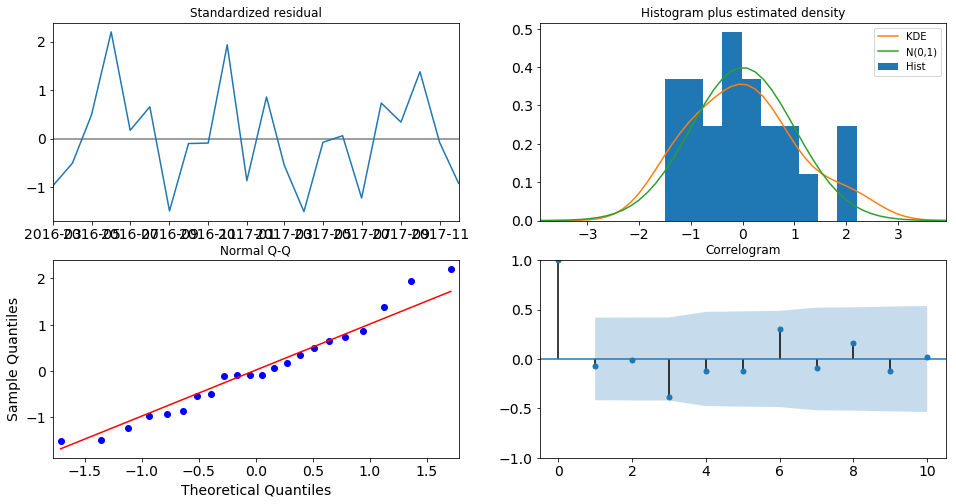

In [43]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
# first plot doesnt give much pattern, there is but not standard
## green line actual time series 
#yellow is what we have to model using model SARIMAX - 
#quntile quantile plot : whatever we have predicted, will check how much normality is there. based on residual

In [ ]:
## Now will build  validated forecast                              

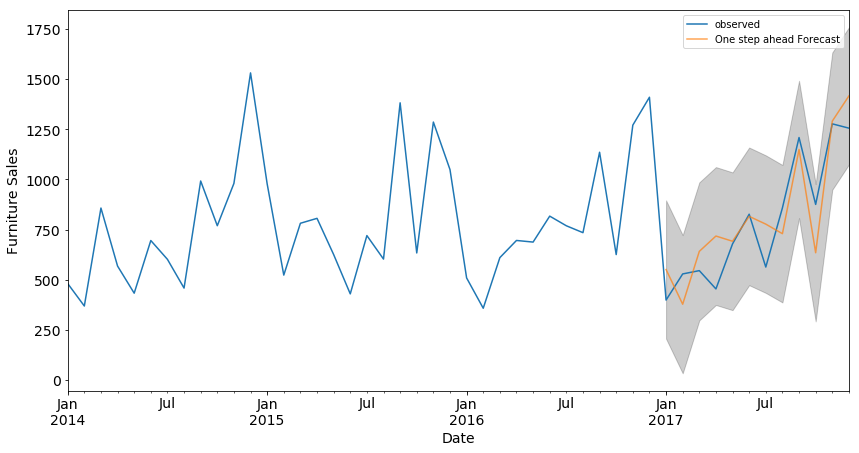

In [48]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
                              
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax= ax, label='One step ahead Forecast', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color = 'k', alpha =0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()